# 1. 데이터 로드 및 단어 토큰화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import torch
import urllib.request
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/13.%20RNN%20CNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")

('IMDB Dataset.csv', <http.client.HTTPMessage at 0x78bd53fbe350>)

In [5]:
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
print('결측값 여부 :',df.isnull().values.any())

결측값 여부 : False


<Axes: xlabel='sentiment'>

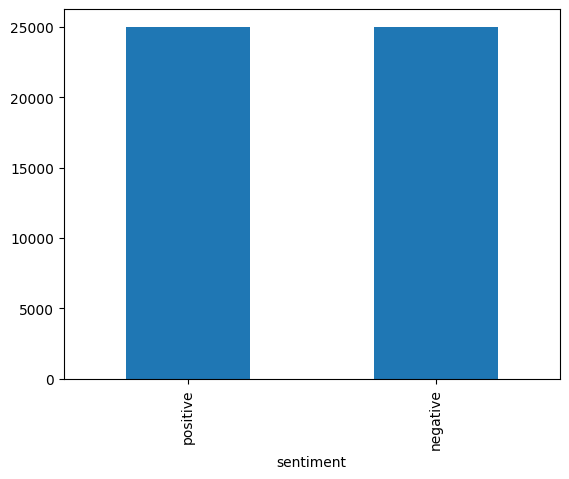

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
print('레이블 개수')
print(df.groupby('sentiment').size().reset_index(name='count'))

레이블 개수
  sentiment  count
0  negative  25000
1  positive  25000


In [ ]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0])

In [ ]:
df.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

In [ ]:
X_data = df['review']
y_data = df['sentiment']
print('영화 리뷰의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

영화 리뷰의 개수: 50000
레이블의 개수: 50000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0, stratify=y_data)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0, stratify=y_train)

In [ ]:
print('--------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_valid.value_counts()[0]/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_valid.value_counts()[1]/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------훈련 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------테스트 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%


In [ ]:
X_train[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
# 질문. 이거 두 개가 같은가?
# 같으면 True, 다르면 False를 출력
'Apple' == 'apple'

False

In [ ]:
# 소문자화
'Apple'.lower()

'apple'

In [ ]:
'Apple'.lower() == 'apple'

True

In [ ]:
# 소문자화
'One'.lower() == 'one'

True

In [ ]:
def tokenize(sentences):
  tokenized_sentences = []
  for sent in tqdm(sentences):
    # 단어 토큰화
    tokenized_sent = word_tokenize(sent)

    # 각 단어는 소문자화로 통일
    tokenized_sent = [word.lower() for word in tokenized_sent]
    tokenized_sentences.append(tokenized_sent)
  return tokenized_sentences

In [ ]:
tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)

100%|██████████| 25000/25000 [00:38<00:00, 643.56it/s]


In [ ]:
print('토큰화 전:', X_train[0])
print('토큰화 후:',tokenize([X_train[0]]))

토큰화 전: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to 

100%|██████████| 1/1 [00:00<00:00, 461.83it/s]

토큰화 후: [['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'you', "'ll", 'be', 'hooked', '.', 'they', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', '.', 'trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary

In [ ]:
len(X_train)

20000

In [ ]:
len(tokenized_X_train)

20000

In [ ]:
print(tokenize([X_train[0]]))

100%|██████████| 1/1 [00:00<00:00, 460.41it/s]

[['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'you', "'ll", 'be', 'hooked', '.', 'they', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', '.', 'trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.',

In [ ]:
# 상위 샘플 2개 출력
for sent in tokenized_X_train[:2]:
  print(sent)

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

# 2. Vocab 만들기

In [ ]:
word_list = []
for sent in tokenized_X_train:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

총 단어수 : 100586


In [ ]:
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_counts['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 :', word_counts['love'])

훈련 데이터에서의 단어 the의 등장 횟수 : 265697
훈련 데이터에서의 단어 love의 등장 횟수 : 4984


In [ ]:
print(word_counts)

Counter({'the': 265697, ',': 216790, '.': 187343, 'a': 129039, 'and': 128875, 'of': 115891, 'to': 106660, 'is': 86561, '/': 80242, '>': 80129, '<': 80047, 'br': 80026, 'it': 75420, 'in': 73970, 'i': 68869, 'this': 59638, 'that': 57281, "'s": 48948, 'was': 39463, 'as': 36669, 'with': 34895, 'for': 34606, 'movie': 33702, 'but': 33427, 'film': 30932, ')': 28520, '(': 27897, 'you': 27659, 'on': 26525, "n't": 26456, "''": 26178, '``': 25834, 'not': 25001, 'are': 23949, 'he': 23226, 'his': 22985, 'have': 22642, 'be': 21155, 'one': 20854, '!': 19752, 'at': 18865, 'all': 18404, 'they': 18360, 'by': 17734, 'an': 17075, 'who': 16680, 'from': 16169, 'so': 15990, 'like': 15803, 'there': 14774, 'or': 14246, 'just': 13973, 'do': 13891, 'has': 13710, 'her': 13671, 'if': 13639, 'about': 13614, '?': 13257, 'out': 13152, 'what': 12781, 'some': 12409, 'when': 11330, 'good': 11216, 'more': 11148, 'very': 10924, 'she': 10648, 'would': 10562, 'up': 9840, 'even': 9832, 'no': 9730, 'my': 9725, 'can': 9573, 'w

In [ ]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])

등장 빈도수 상위 10개 단어
['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>']


In [ ]:
print(vocab)

['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>', '<', 'br', 'it', 'in', 'i', 'this', 'that', "'s", 'was', 'as', 'with', 'for', 'movie', 'but', 'film', ')', '(', 'you', 'on', "n't", "''", '``', 'not', 'are', 'he', 'his', 'have', 'be', 'one', '!', 'at', 'all', 'they', 'by', 'an', 'who', 'from', 'so', 'like', 'there', 'or', 'just', 'do', 'has', 'her', 'if', 'about', '?', 'out', 'what', 'some', 'when', 'good', 'more', 'very', 'she', 'would', 'up', 'even', 'no', 'my', 'can', 'which', 'time', 'really', 'see', 'only', 'their', 'had', 'story', 'were', 'did', 'me', 'we', 'does', '...', "'", 'much', '-', 'well', 'than', ':', 'could', 'been', 'get', 'will', 'other', 'into', 'great', 'also', 'people', 'most', 'because', 'how', 'bad', 'first', 'him', 'its', 'then', 'make', 'them', 'made', 'way', 'after', 'any', 'too', 'characters', 'movies', 'think', 'character', 'films', ';', '*', 'many', 'watch', 'being', 'seen', 'two', 'never', 'where', 'acting', 'plot', 'love', 'show', 'know', 'little'

In [ ]:
print(len(vocab))

100586


In [ ]:
threshold = 3
total_cnt = len(word_counts) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 100586
등장 빈도가 2번 이하인 희귀 단어의 수: 61877
단어 집합에서 희귀 단어의 비율: 61.51651323245779
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3294254426463437


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :', len(vocab))

단어 집합의 크기 : 38709


In [ ]:
print(vocab)

['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>', '<', 'br', 'it', 'in', 'i', 'this', 'that', "'s", 'was', 'as', 'with', 'for', 'movie', 'but', 'film', ')', '(', 'you', 'on', "n't", "''", '``', 'not', 'are', 'he', 'his', 'have', 'be', 'one', '!', 'at', 'all', 'they', 'by', 'an', 'who', 'from', 'so', 'like', 'there', 'or', 'just', 'do', 'has', 'her', 'if', 'about', '?', 'out', 'what', 'some', 'when', 'good', 'more', 'very', 'she', 'would', 'up', 'even', 'no', 'my', 'can', 'which', 'time', 'really', 'see', 'only', 'their', 'had', 'story', 'were', 'did', 'me', 'we', 'does', '...', "'", 'much', '-', 'well', 'than', ':', 'could', 'been', 'get', 'will', 'other', 'into', 'great', 'also', 'people', 'most', 'because', 'how', 'bad', 'first', 'him', 'its', 'then', 'make', 'them', 'made', 'way', 'after', 'any', 'too', 'characters', 'movies', 'think', 'character', 'films', ';', '*', 'many', 'watch', 'being', 'seen', 'two', 'never', 'where', 'acting', 'plot', 'love', 'show', 'know', 'little'

In [ ]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

In [ ]:
for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

In [ ]:
vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)

패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 : 38711


In [ ]:
print('단어 <PAD>와 맵핑되는 정수 :', word_to_index['<PAD>'])
print('단어 <UNK>와 맵핑되는 정수 :', word_to_index['<UNK>'])
print('단어 the와 맵핑되는 정수 :', word_to_index['the'])

단어 <PAD>와 맵핑되는 정수 : 0
단어 <UNK>와 맵핑되는 정수 : 1
단어 the와 맵핑되는 정수 : 2


In [ ]:
# Vocabulary
print(word_to_index)

{'<PAD>': 0, '<UNK>': 1, 'the': 2, ',': 3, '.': 4, 'a': 5, 'and': 6, 'of': 7, 'to': 8, 'is': 9, '/': 10, '>': 11, '<': 12, 'br': 13, 'it': 14, 'in': 15, 'i': 16, 'this': 17, 'that': 18, "'s": 19, 'was': 20, 'as': 21, 'with': 22, 'for': 23, 'movie': 24, 'but': 25, 'film': 26, ')': 27, '(': 28, 'you': 29, 'on': 30, "n't": 31, "''": 32, '``': 33, 'not': 34, 'are': 35, 'he': 36, 'his': 37, 'have': 38, 'be': 39, 'one': 40, '!': 41, 'at': 42, 'all': 43, 'they': 44, 'by': 45, 'an': 46, 'who': 47, 'from': 48, 'so': 49, 'like': 50, 'there': 51, 'or': 52, 'just': 53, 'do': 54, 'has': 55, 'her': 56, 'if': 57, 'about': 58, '?': 59, 'out': 60, 'what': 61, 'some': 62, 'when': 63, 'good': 64, 'more': 65, 'very': 66, 'she': 67, 'would': 68, 'up': 69, 'even': 70, 'no': 71, 'my': 72, 'can': 73, 'which': 74, 'time': 75, 'really': 76, 'see': 77, 'only': 78, 'their': 79, 'had': 80, 'story': 81, 'were': 82, 'did': 83, 'me': 84, 'we': 85, 'does': 86, '...': 87, "'": 88, 'much': 89, '-': 90, 'well': 91, 'than

`<UNK>`: Unknown  
- 모르는 단어에 대해서 정수로 변환하고자 할 때는 맵핑해주는 special token  
- 앞으로 모르는 단어가 등장하면 정수 1로 맵핑.

In [ ]:
word_to_index['electrofishing']

KeyError: 'electrofishing'

# 3. 정수 인코딩

In [ ]:
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

In [ ]:
encoded_X_train = texts_to_sequences(tokenized_X_train, word_to_index)
encoded_X_valid = texts_to_sequences(tokenized_X_valid, word_to_index)
encoded_X_test = texts_to_sequences(tokenized_X_test, word_to_index)

In [ ]:
# 상위 샘플 2개 출력
for sent in encoded_X_train[:2]:
  print(sent)

[38, 29, 140, 3, 52, 54, 29, 38, 3, 5, 3406, 47, 19, 95, 22, 29, 161, 4059, 6, 1741, 3, 47, 29, 293, 39, 469, 218, 3, 6, 47, 29, 134, 71, 532, 61, 59, 25184, 130, 214, 44, 249, 2, 189, 114, 58, 29, 41, 12, 13, 10, 11, 12, 13, 10, 11, 384, 3, 384, 253, 26, 4, 57, 29, 38, 5, 2280, 1587, 23, 1477, 3, 17, 9, 5775, 8, 111, 29, 1440, 71, 532, 141, 677, 4, 16, 343, 8, 126, 17, 24, 43, 2, 75, 63, 16, 20, 5, 137, 538, 3, 6, 16, 172, 18, 164, 3, 42, 677, 12075, 3, 16, 134, 14, 21, 89, 21, 16, 83, 110, 4, 16, 94, 130, 1124, 30, 5, 494, 121, 110, 3, 6, 16, 145, 54, 31, 120, 16, 73, 41, 16, 134, 43, 301, 7, 2, 1477, 4, 2, 425, 204, 66, 168, 6, 3964, 3, 50, 5, 1961, 3, 25, 19699, 253, 4, 16, 54, 134, 580, 3, 6, 105, 42, 2, 152, 36, 544, 18, 36, 55, 5, 253, 42, 247, 4, 933, 3, 421, 3, 25, 40, 227, 407, 18, 17, 9, 965, 8, 39, 5, 253, 26, 3, 6, 14, 17326, 18, 233, 872, 4, 8000, 55, 53, 2, 416, 4967, 7, 33, 1, 32, 6, 2669, 9, 2, 416, 1, 2144, 8, 2, 208, 3, 8988, 13008, 12, 13, 10, 11, 12, 13, 10, 11, 2,

In [ ]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [ ]:
print(index_to_word)

{0: '<PAD>', 1: '<UNK>', 2: 'the', 3: ',', 4: '.', 5: 'a', 6: 'and', 7: 'of', 8: 'to', 9: 'is', 10: '/', 11: '>', 12: '<', 13: 'br', 14: 'it', 15: 'in', 16: 'i', 17: 'this', 18: 'that', 19: "'s", 20: 'was', 21: 'as', 22: 'with', 23: 'for', 24: 'movie', 25: 'but', 26: 'film', 27: ')', 28: '(', 29: 'you', 30: 'on', 31: "n't", 32: "''", 33: '``', 34: 'not', 35: 'are', 36: 'he', 37: 'his', 38: 'have', 39: 'be', 40: 'one', 41: '!', 42: 'at', 43: 'all', 44: 'they', 45: 'by', 46: 'an', 47: 'who', 48: 'from', 49: 'so', 50: 'like', 51: 'there', 52: 'or', 53: 'just', 54: 'do', 55: 'has', 56: 'her', 57: 'if', 58: 'about', 59: '?', 60: 'out', 61: 'what', 62: 'some', 63: 'when', 64: 'good', 65: 'more', 66: 'very', 67: 'she', 68: 'would', 69: 'up', 70: 'even', 71: 'no', 72: 'my', 73: 'can', 74: 'which', 75: 'time', 76: 'really', 77: 'see', 78: 'only', 79: 'their', 80: 'had', 81: 'story', 82: 'were', 83: 'did', 84: 'me', 85: 'we', 86: 'does', 87: '...', 88: "'", 89: 'much', 90: '-', 91: 'well', 92: '

In [ ]:
print(tokenized_X_train[0])

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

In [ ]:
print(encoded_X_train[0])

[38, 29, 140, 3, 52, 54, 29, 38, 3, 5, 3406, 47, 19, 95, 22, 29, 161, 4059, 6, 1741, 3, 47, 29, 293, 39, 469, 218, 3, 6, 47, 29, 134, 71, 532, 61, 59, 25184, 130, 214, 44, 249, 2, 189, 114, 58, 29, 41, 12, 13, 10, 11, 12, 13, 10, 11, 384, 3, 384, 253, 26, 4, 57, 29, 38, 5, 2280, 1587, 23, 1477, 3, 17, 9, 5775, 8, 111, 29, 1440, 71, 532, 141, 677, 4, 16, 343, 8, 126, 17, 24, 43, 2, 75, 63, 16, 20, 5, 137, 538, 3, 6, 16, 172, 18, 164, 3, 42, 677, 12075, 3, 16, 134, 14, 21, 89, 21, 16, 83, 110, 4, 16, 94, 130, 1124, 30, 5, 494, 121, 110, 3, 6, 16, 145, 54, 31, 120, 16, 73, 41, 16, 134, 43, 301, 7, 2, 1477, 4, 2, 425, 204, 66, 168, 6, 3964, 3, 50, 5, 1961, 3, 25, 19699, 253, 4, 16, 54, 134, 580, 3, 6, 105, 42, 2, 152, 36, 544, 18, 36, 55, 5, 253, 42, 247, 4, 933, 3, 421, 3, 25, 40, 227, 407, 18, 17, 9, 965, 8, 39, 5, 253, 26, 3, 6, 14, 17326, 18, 233, 872, 4, 8000, 55, 53, 2, 416, 4967, 7, 33, 1, 32, 6, 2669, 9, 2, 416, 1, 2144, 8, 2, 208, 3, 8988, 13008, 12, 13, 10, 11, 12, 13, 10, 11, 2,

In [ ]:
decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', tokenized_X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

기존의 첫번째 샘플 : ['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!',

In [ ]:
word_to_index['heart-swelling']

KeyError: 'heart-swelling'

# 4. 패딩

리뷰의 최대 길이 : 2818
리뷰의 평균 길이 : 279.1958


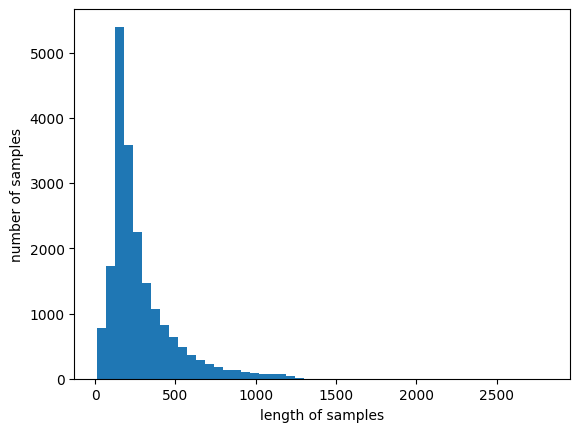

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 500
below_threshold_len(max_len, encoded_X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 87.795


In [ ]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

In [ ]:
padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

In [ ]:
print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)

훈련 데이터의 크기 : (20000, 500)
검증 데이터의 크기 : (5000, 500)
테스트 데이터의 크기 : (25000, 500)


In [ ]:
print('첫번째 샘플의 길이 :', len(padded_X_train[0]))
print('첫번째 샘플 :', padded_X_train[0])

첫번째 샘플의 길이 : 500
첫번째 샘플 : [   38    29   140     3    52    54    29    38     3     5  3406    47
    19    95    22    29   161  4059     6  1741     3    47    29   293
    39   469   218     3     6    47    29   134    71   532    61    59
 25184   130   214    44   249     2   189   114    58    29    41    12
    13    10    11    12    13    10    11   384     3   384   253    26
     4    57    29    38     5  2280  1587    23  1477     3    17     9
  5775     8   111    29  1440    71   532   141   677     4    16   343
     8   126    17    24    43     2    75    63    16    20     5   137
   538     3     6    16   172    18   164     3    42   677 12075     3
    16   134    14    21    89    21    16    83   110     4    16    94
   130  1124    30     5   494   121   110     3     6    16   145    54
    31   120    16    73    41    16   134    43   301     7     2  1477
     4     2   425   204    66   168     6  3964     3    50     5  1961
     3    25 19699   253 

In [ ]:
y_train[0]

1

In [ ]:
print(list(y_train))

[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 

# 5. 모델링

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))

In [ ]:
print(padded_X_train[0])

[   38    29   140     3    52    54    29    38     3     5  3406    47
    19    95    22    29   161  4059     6  1741     3    47    29   293
    39   469   218     3     6    47    29   134    71   532    61    59
 25184   130   214    44   249     2   189   114    58    29    41    12
    13    10    11    12    13    10    11   384     3   384   253    26
     4    57    29    38     5  2280  1587    23  1477     3    17     9
  5775     8   111    29  1440    71   532   141   677     4    16   343
     8   126    17    24    43     2    75    63    16    20     5   137
   538     3     6    16   172    18   164     3    42   677 12075     3
    16   134    14    21    89    21    16    83   110     4    16    94
   130  1124    30     5   494   121   110     3     6    16   145    54
    31   120    16    73    41    16   134    43   301     7     2  1477
     4     2   425   204    66   168     6  3964     3    50     5  1961
     3    25 19699   253     4    16    54   134   

In [ ]:
train_label_tensor[0]

tensor(1)

In [ ]:
train_label_tensor[:5]

tensor([1, 1, 0, 0, 0])

In [ ]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", device)

cpu와 cuda 중 다음 기기로 학습함: cuda


In [ ]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        # 임베딩층. 각 단어를 벡터화하는 층. (입력)
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # GRU = 실제 RNN에 해당하는 부분
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)

        # 출력층 = 모델이 어떤 예측을 하게 할 것인지를 결정. 여기서는 분류.
        self.fc = nn.Linear(hidden_dim, output_dim) # output_dim = 분류하고자하는 카테고리의 개수

    def forward(self, x):
        # x: (batch_size, seq_length) == (32, 500)
        embedded = self.embedding(x)  # (batch_size, seq_length, embedding_dim) == (32, 500, 150) == (데이터의 개수, 문장길이, 단어 벡터의 차원)
        gru_out, hidden = self.gru(embedded)  # gru_out: (batch_size, seq_length, hidden_dim), hidden: (1, batch_size, hidden_dim)
        last_hidden = hidden.squeeze(0)  # (batch_size, hidden_dim)
        logits = self.fc(last_hidden)  # (batch_size, output_dim)
        return logits

In [ ]:
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)

In [ ]:
20000/32

625.0

In [ ]:
num_epochs = 5
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 625


In [ ]:
embedding_dim = 100 # 임베딩 벡터의 차원
hidden_dim = 128 # RNN의 은닉층의 크기. 은닉 상태 벡터의 차원
output_dim = 2 # 분류하고자하는 카테고리 개수
learning_rate = 0.01 # 학습률
num_epochs = 5 # 학습 횟수

In [ ]:
# vocab_size = 38711
model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)

TextClassifier(
  (embedding): Embedding(38711, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def calculate_accuracy(logits, labels):
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

In [ ]:
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 모델의 예측값
            logits = model(batch_X)

            # 손실을 계산
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy

In [ ]:
# Training loop
best_val_loss = float('inf')

# Training loop
# epoch = 전체 데이터에 대한 학습 횟수.
# 전체 데이터가 5만개면 5만개를 한 번 다 훑는 것.
for epoch in range(num_epochs):
    # Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()

    # train_dataloader 배치 크기 32
    # 데이터가 32개씩 꺼내와진다.
    for batch_X, batch_y in train_dataloader:

        # batch_X.shape == (batch_size, max_len)
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        logits = model(batch_X)

        # Compute loss
        loss = criterion(logits, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad() # 미분값 0으로 초기화
        loss.backward() # 미분
        optimizer.step() # 미분값을 바탕으로 모든 파라미터 업데이트

        # Calculate training accuracy and loss
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    # Validation
    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')

Epoch 1/5:
Train Loss: 0.6969, Train Accuracy: 0.4980
Validation Loss: 0.6922, Validation Accuracy: 0.5076
Validation loss improved from inf to 0.6922. 체크포인트를 저장합니다.
Epoch 2/5:
Train Loss: 0.6907, Train Accuracy: 0.5178
Validation Loss: 0.6914, Validation Accuracy: 0.5126
Validation loss improved from 0.6922 to 0.6914. 체크포인트를 저장합니다.
Epoch 3/5:
Train Loss: 0.6514, Train Accuracy: 0.6100
Validation Loss: 0.7161, Validation Accuracy: 0.5028
Epoch 4/5:
Train Loss: 0.6025, Train Accuracy: 0.6443
Validation Loss: 0.4181, Validation Accuracy: 0.8088
Validation loss improved from 0.6914 to 0.4181. 체크포인트를 저장합니다.
Epoch 5/5:
Train Loss: 0.3074, Train Accuracy: 0.8713
Validation Loss: 0.3027, Validation Accuracy: 0.8750
Validation loss improved from 0.4181 to 0.3027. 체크포인트를 저장합니다.


# 6. 모델 로드 및 평가

In [ ]:
# 모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델을 device에 올립니다.
model.to(device)

# 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')

<ipython-input-80-6e21ff73ec1f>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_checkpoint.pth'))


Best model validation loss: 0.3027
Best model validation accuracy: 0.8750


In [ ]:
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')

Best model test loss: 0.3174
Best model test accuracy: 0.8650


# 7. 인퍼런스(테스트)

In [ ]:
index_to_tag = {0 : '부정', 1 : '긍정'}

In [ ]:
def predict(text, model, word_to_index, index_to_tag):
    # Set the model to evaluation mode
    model.eval()

    # Tokenize the input text
    tokens = word_tokenize(text)
    token_indices = [word_to_index.get(token.lower(), 1) for token in tokens]

    # Convert tokens to tensor
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)  # (1, seq_length)

    # Pass the input tensor through the model
    with torch.no_grad():
        logits = model(input_tensor)  # (1, output_dim)

    # Get the predicted class index
    predicted_index = torch.argmax(logits, dim=1)

    # Convert the predicted index to its corresponding tag
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag

In [ ]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

predict(test_input, model, word_to_index, index_to_tag)

'부정'

In [ ]:
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

predict(test_input, model, word_to_index, index_to_tag)

'긍정'